<a href="https://colab.research.google.com/github/sruthi1996/MachineLearning/blob/master/Kmeans%26WardsClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving IBM.csv to IBM.csv


In [0]:
import io
df= pd.read_csv(io.BytesIO(uploaded['IBM.csv']))
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Since we cannot deal with categorical features while performing clustering, these non-numerical features have been one-hot encoded for better results.
  Also, a heat map has been generated to check the dependency of each of the parameters present in the dataset.

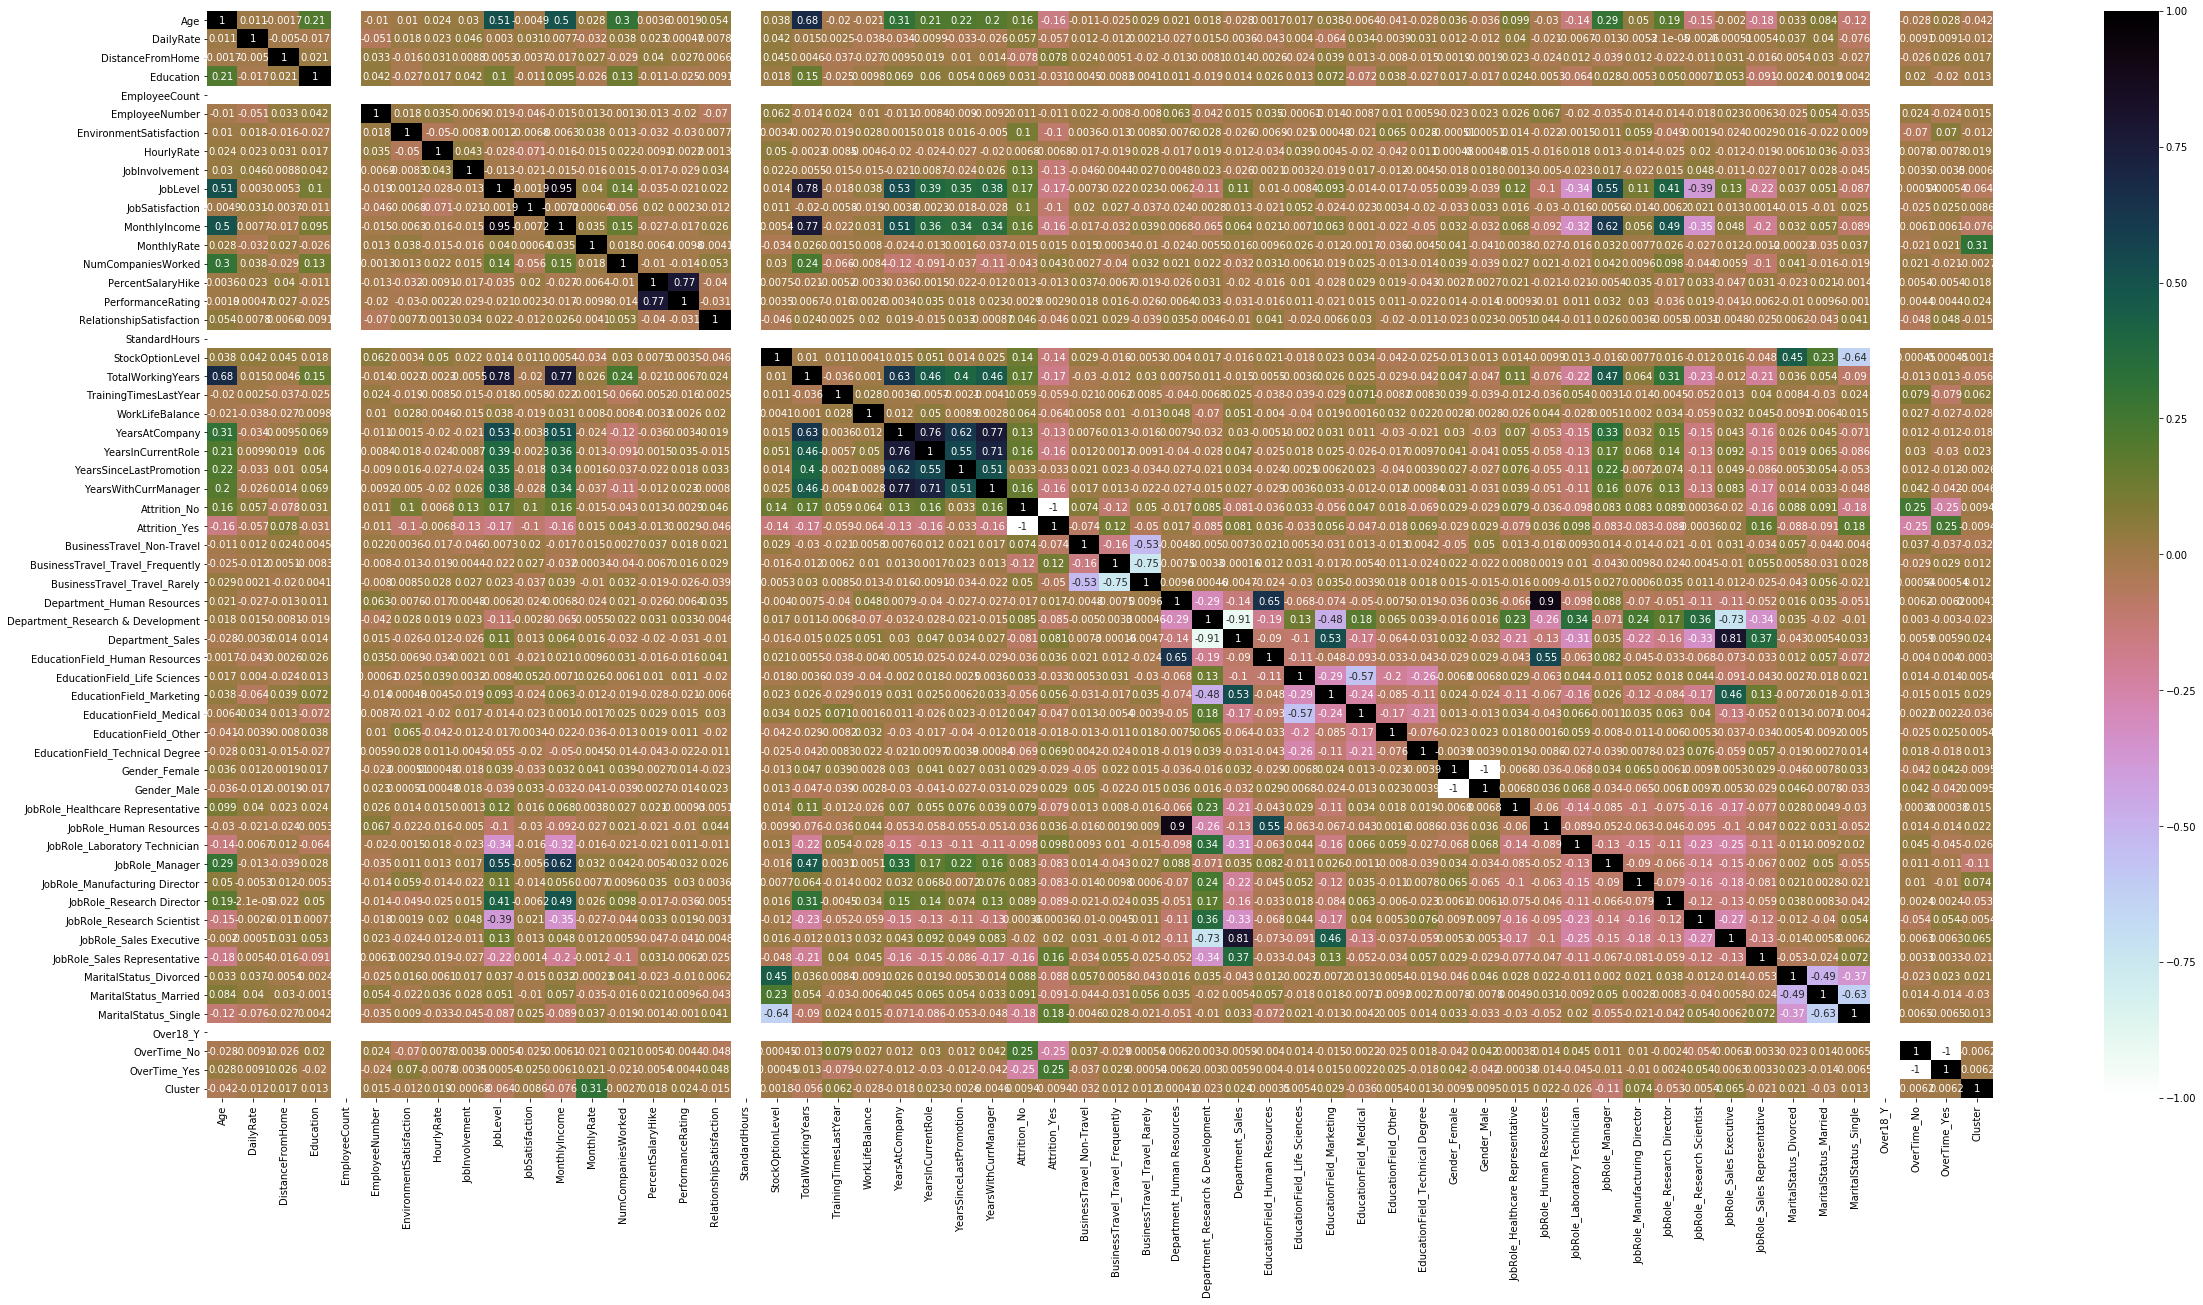

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
#Also, we can generate a heatmap to understand the correlations among the features of the dataset.
plt.figure(figsize=(40,20)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [0]:
df = pd.get_dummies(data=df, columns=['Attrition','BusinessTravel','Department','EducationField',
                                      'Gender','JobRole','MaritalStatus','Over18',
                                      'OverTime'])

In [0]:
from google.colab import drive
drive.mount('drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
df.to_csv('data.csv')
!cp data.csv "drive/My Drive/"

In [0]:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0


Looking at various features of the datasets and after drawing a correlation analysis amongst them; it is understood that there are few features like job role and manager position, YearsSinceLastPromotion and TotalWorkingYears etc, have more correlation or inter-dependency.
Hence I have performed clustering by considering 2 of the most correlated features.

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
df1=df[['YearsSinceLastPromotion','TotalWorkingYears']]
print(df1.head())

   YearsSinceLastPromotion  TotalWorkingYears
0                        0                  8
1                        1                 10
2                        0                  7
3                        3                  8
4                        2                  6


In [0]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(df1)
centers = km.cluster_centers_
print(centers)



[[ 0.73421927  4.85049834]
 [ 4.53007519 24.83834586]
 [ 2.60631229 11.71760797]]


In [0]:
km = KMeans(n_clusters = 4, n_jobs = 4, random_state=21)
km.fit(df1)
centers = km.cluster_centers_
print(centers)

[[ 2.91208791 17.55677656]
 [ 0.75283447  3.87981859]
 [ 5.75471698 27.8427673 ]
 [ 1.96649916  9.4639866 ]]


In [0]:
km = KMeans(n_clusters = 5, n_jobs = 4, random_state=21)
km.fit(df1)
centers = km.cluster_centers_
print(centers)

[[ 0.69444444  4.26984127]
 [ 2.36326531 17.37142857]
 [12.3        24.7       ]
 [ 2.04464286 28.30357143]
 [ 2.22077922  9.78478664]]


In [0]:
km = KMeans(n_clusters = 6, n_jobs = 4, random_state=21)
km.fit(df1)
centers = km.cluster_centers_
print(centers)

[[ 0.75283447  3.87981859]
 [ 6.65142857 11.25142857]
 [12.34328358 25.04477612]
 [ 2.04       28.94      ]
 [ 0.70107527  9.28172043]
 [ 1.63513514 18.07657658]]


In [0]:
km = KMeans(n_clusters = 7, n_jobs = 4, random_state=21)
km.fit(df1)
centers = km.cluster_centers_
print(centers)

[[ 6.78807947 10.58940397]
 [ 1.45185185 22.12592593]
 [ 2.12643678 15.53448276]
 [ 0.75283447  3.87981859]
 [ 3.3125     32.015625  ]
 [12.296875   23.640625  ]
 [ 0.66666667  9.11337868]]


In [0]:
km = KMeans(n_clusters = 8, n_jobs = 4, random_state=21)
km.fit(df1)
centers = km.cluster_centers_
print(centers)

[[ 1.76086957 16.95108696]
 [ 0.79452055  6.07762557]
 [12.18032787 22.95081967]
 [ 1.66019417 24.13592233]
 [ 0.55757576  1.63030303]
 [ 0.70957096 10.25742574]
 [ 6.67901235 10.83333333]
 [ 4.46296296 33.        ]]


I have used the **elbow method** to validate the number of clusters as a more effiecient way; for each value of k, the sum of squared error(SSE) is calculated.
  Our goal is to pick the least value of K for which the SSE is small & the elbow usually represents where we start to have decreasing results for a given K value.
  I have obtained k=3; for my dataset.

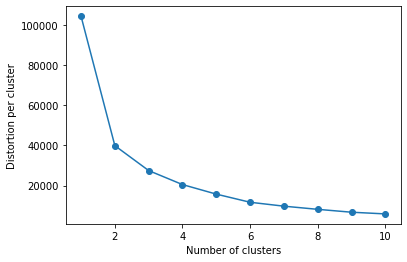

In [0]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df1)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion per cluster')
plt.show()

**Agglomarative clustering**
Called as an Bottom up approach; It is a heirarchial clustering technique that is used where each point is considered as an individual cluster and other data points are merged based on the proximity.
This process is repititive and continues until all the clusters are merged to one.
The proximity between two points is calculated via various distance metrics like MIN,MAX, AVG, Distance between Centroids, etc.




In [0]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import Birch

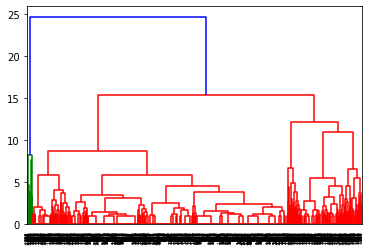

In [0]:
dendrogram = sch.dendrogram(sch.linkage(df1, method='average'))

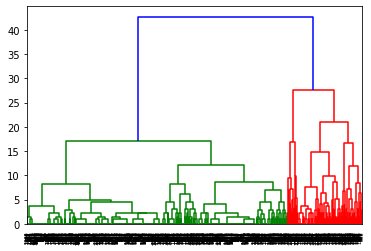

In [0]:
dendrogram = sch.dendrogram(sch.linkage(df1, method='complete'))

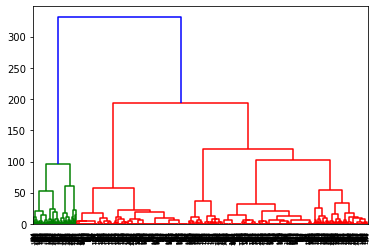

In [0]:
dendrogram = sch.dendrogram(sch.linkage(df1, method='ward'))

**Ward's Method** is a type of agglomorative clustering technique which says that between 2 clusters, the distnace is measured as to how much the sum of sqaures will increase when they both are merged; i.e. when there are two clusters are are equidistant from a third cluster, then the one which is smaller in size is prefered; making sure that the merging cost is kept minimum.
